In [24]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re   
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


In [25]:
def load_data():
    data = pd.read_csv('datacrawling.csv', encoding='cp437')
    return data

In [26]:
tweet_df = load_data()
tweet_df.head()

,Date,Tweet
0,2022-03-17 03:45:14+00:00,b'@airaniiofifteen mA-chan'
1,2022-03-17 03:38:28+00:00,"b'@airaniiofifteen Selamat Pagi, Iofi! Good Morning! We Ioforias hope you slept well! Make sure ..."
2,2022-03-17 03:31:44+00:00,b'The OG of virtual youtuber https://t.co/xn5gmmvmyi'
3,2022-03-17 03:13:16+00:00,b'@airaniiofifteen Iofi Good morning'
4,2022-03-17 03:12:44+00:00,b'@airaniiofifteen @shirakamifubuki Fiestaaaaa \xf0\x9f\x8e\x89'


In [27]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (2794, 2)
Columns are: Index(['Date', 'Tweet'], dtype='object')


In [28]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2794 non-null   object
 1   Tweet   2794 non-null   object
dtypes: object(2)
memory usage: 43.8+ KB


In [29]:
tweet_df['label1'] = tweet_df.index

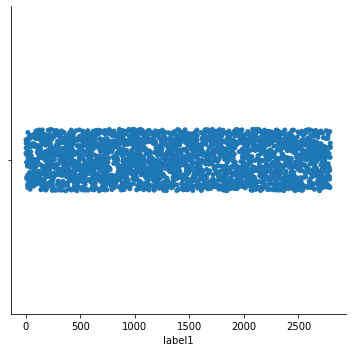

In [30]:
sns.catplot(x = 'label1', data = tweet_df)

In [31]:
df  = pd.DataFrame(tweet_df[['Date', 'Tweet']])

In [33]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_ADR = tweet_df[tweet_df['label1']==1]
df_NADR = tweet_df[tweet_df['label1']==0]
tweet_All = " ".join(review for review in df.Tweet)
tweet_ADR = " ".join(review for review in df_ADR.Tweet)
tweet_NADR = " ".join(review for review in df_NADR.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')

#wordcloud.to_file("img/first_review.png")

ModuleNotFoundError: No module named 'wordcloud'

#Preprocessing data

In [10]:
# menghilangkan punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,Date,Tweet,Tweet_punct
0,2022-03-17 03:45:14+00:00,b'@airaniiofifteen mA-chan',bairaniiofifteen mAchan
1,2022-03-17 03:38:28+00:00,"b'@airaniiofifteen Selamat Pagi, Iofi! Good Morning! We Ioforias hope you slept well! Make sure ...",bairaniiofifteen Selamat Pagi Iofi Good Morning We Ioforias hope you slept well Make sure to hav...
2,2022-03-17 03:31:44+00:00,b'The OG of virtual youtuber https://t.co/xn5gmmvmyi',bThe OG of virtual youtuber httpstcoxngmmvmyi
3,2022-03-17 03:13:16+00:00,b'@airaniiofifteen Iofi Good morning',bairaniiofifteen Iofi Good morning
4,2022-03-17 03:12:44+00:00,b'@airaniiofifteen @shirakamifubuki Fiestaaaaa \xf0\x9f\x8e\x89',bairaniiofifteen shirakamifubuki Fiestaaaaa xfxfxex
5,2022-03-17 03:12:43+00:00,b'@airaniiofifteen Pagee https://t.co/jcRBOv0Rku',bairaniiofifteen Pagee httpstcojcRBOvRku
6,2022-03-17 03:00:43+00:00,"b""@airaniiofifteen Joke's on you. I don't have Monhun or a Switch. https://t.co/6LunK4KiWz""",bairaniiofifteen Jokes on you I dont have Monhun or a Switch httpstcoLunKKiWz
7,2022-03-17 02:58:18+00:00,"b'@airaniiofifteen Good morning , Iofi\xe2\x9c\xa8'",bairaniiofifteen Good morning Iofixexcxa
8,2022-03-17 02:52:18+00:00,b'@airaniiofifteen @shirakamifubuki We need a drunk \xe3\x82\xa8\xe3\x83\xadfi + Ollie collab st...,bairaniiofifteen shirakamifubuki We need a drunk xexxaxexxadfi Ollie collab stream The absolute...
9,2022-03-17 02:39:43+00:00,b'@airaniiofifteen It will be gatcha then',bairaniiofifteen It will be gatcha then


In [39]:
# Preprocessor
def preprocessor(text):
    # Convert to lower case
    text = text.lower()
    # Remove additional code
    text = text.replace('\\xe2\\x80\\xa6', '')
    # Convert www.* or https?://* to URL
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    # Convert @username to AT_USER
    text = re.sub('@[^\s]+','',text)
    # Remove additional white spaces
    text = re.sub('[\s]+', ' ', text)
    # Replace #word with word
    text = re.sub(r'#([^\s]+)', r'\1',text)
    # Menghapus angka dari teks
    text = re.sub(r"\d+", "", text)
    # Menganti tanda baca dengan spasi
    text = text.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    return text(10)
    df.head

In [36]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

KeyError: 'Tweet_punct'

Stopwords

In [13]:
stopword = nltk.corpus.stopwords.words('english')

In [14]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,2021-11-24 23:59:58+00:00,b'@egik_prabowo @kikasyafii @jokowi @Puspen_TNI @DivHumas_Polri kamu tau kan kenapa dia memilih ...,begikprabowo kikasyafii jokowi PuspenTNI DivHumasPolri kamu tau kan kenapa dia memilih untuk tid...,"[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, kamu, tau, kan, kenapa, dia, memili...","[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, tau, memilih, melerai, wkw]"
1,2021-11-24 23:59:30+00:00,b'Keberhasilan Pemerintahan Presiden Jokowi\n\nJokowi Bangun Nusantara https://t.co/2zE5FO5tJD',bKeberhasilan Pemerintahan Presiden JokowinnJokowi Bangun Nusantara httpstcozEFOtJD,"[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]"
2,2021-11-24 23:59:23+00:00,b'@detikcom Jokowi malah minta tiga periode',bdetikcom Jokowi malah minta tiga periode,"[bdetikcom, jokowi, malah, minta, tiga, periode]","[bdetikcom, jokowi, periode]"
3,2021-11-24 23:59:19+00:00,b'Keberhasilan Pemerintahan Presiden Jokowi\n\nJokowi Bangun Nusantara https://t.co/ETUgu04oEI',bKeberhasilan Pemerintahan Presiden JokowinnJokowi Bangun Nusantara httpstcoETUguoEI,"[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]"
4,2021-11-24 23:58:59+00:00,b'@tvOneNews Sepertinya Pak Jokowi sedang mengkritik Bapak Presiden.',btvOneNews Sepertinya Pak Jokowi sedang mengkritik Bapak Presiden,"[btvonenews, sepertinya, pak, jokowi, sedang, mengkritik, bapak, presiden]","[btvonenews, jokowi, mengkritik, presiden]"
5,2021-11-24 23:58:42+00:00,b'Ternyata Jokowi Yang Akan Mencari Lokasi Balap Formula E https://t.co/R7Xp45UXXm https://t.co/...,bTernyata Jokowi Yang Akan Mencari Lokasi Balap Formula E httpstcoRXpUXXm httpstcooxqinDqqq,"[bternyata, jokowi, yang, akan, mencari, lokasi, balap, formula, e, httpstcorxpuxxm, httpstcooxq...","[bternyata, jokowi, mencari, lokasi, balap, formula, e, httpstcorxpuxxm, httpstcooxqindqqq]"
6,2021-11-24 23:58:24+00:00,"b'@Agustio87711949 @FerdinandHaean3 Janji tertulis, pemimpin mana yg bisa 100%memenuhi janjinya?...",bAgustio FerdinandHaean Janji tertulis pemimpin mana yg bisa memenuhi janjinya nYg penting bukti...,"[bagustio, ferdinandhaean, janji, tertulis, pemimpin, mana, yg, bisa, memenuhi, janjinya, nyg, p...","[bagustio, ferdinandhaean, janji, tertulis, pemimpin, yg, memenuhi, janjinya, nyg, bukti, nyxexx..."
7,2021-11-24 23:58:22+00:00,b'@agdrzx @bangopang_ Ee? Emng pak Jokowi \xf0\x9f\x99\x84',bagdrzx bangopang Ee Emng pak Jokowi xfxfxx,"[bagdrzx, bangopang, ee, emng, pak, jokowi, xfxfxx]","[bagdrzx, bangopang, ee, emng, jokowi, xfxfxx]"
8,2021-11-24 23:58:22+00:00,b'@Azul53559127 Mulai cari aman dgn alasan bela jokowi\nMakanya otak di pake kalo bikin steatmen...,bAzul Mulai cari aman dgn alasan bela jokowinMakanya otak di pake kalo bikin steatmentnEmg yg mi...,"[bazul, mulai, cari, aman, dgn, alasan, bela, jokowinmakanya, otak, di, pake, kalo, bikin, steat...","[bazul, cari, aman, dgn, alasan, bela, jokowinmakanya, otak, pake, kalo, bikin, steatmentnemg, y..."
9,2021-11-24 23:58:19+00:00,b'Kok jadi mkin khawatir ya tinggal di Indonesia.. Pak @jokowi Pak @Kiyai_MarufAmin Pak @prabowo...,bKok jadi mkin khawatir ya tinggal di Indonesia Pak jokowi Pak KiyaiMarufAmin Pak prabowo Pak mo...,"[bkok, jadi, mkin, khawatir, ya, tinggal, di, indonesia, pak, jokowi, pak, kiyaimarufamin, pak, ...","[bkok, mkin, khawatir, ya, tinggal, indonesia, jokowi, kiyaimarufamin, prabowo, mohmahfudmdxexxa..."


Stemming and Lammitization

In [15]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,2021-11-24 23:59:58+00:00,b'@egik_prabowo @kikasyafii @jokowi @Puspen_TNI @DivHumas_Polri kamu tau kan kenapa dia memilih ...,begikprabowo kikasyafii jokowi PuspenTNI DivHumasPolri kamu tau kan kenapa dia memilih untuk tid...,"[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, kamu, tau, kan, kenapa, dia, memili...","[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, tau, memilih, melerai, wkw]","[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, tau, memilih, melerai, wkw]"
1,2021-11-24 23:59:30+00:00,b'Keberhasilan Pemerintahan Presiden Jokowi\n\nJokowi Bangun Nusantara https://t.co/2zE5FO5tJD',bKeberhasilan Pemerintahan Presiden JokowinnJokowi Bangun Nusantara httpstcozEFOtJD,"[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]"
2,2021-11-24 23:59:23+00:00,b'@detikcom Jokowi malah minta tiga periode',bdetikcom Jokowi malah minta tiga periode,"[bdetikcom, jokowi, malah, minta, tiga, periode]","[bdetikcom, jokowi, periode]","[bdetikcom, jokowi, period]"
3,2021-11-24 23:59:19+00:00,b'Keberhasilan Pemerintahan Presiden Jokowi\n\nJokowi Bangun Nusantara https://t.co/ETUgu04oEI',bKeberhasilan Pemerintahan Presiden JokowinnJokowi Bangun Nusantara httpstcoETUguoEI,"[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]"
4,2021-11-24 23:58:59+00:00,b'@tvOneNews Sepertinya Pak Jokowi sedang mengkritik Bapak Presiden.',btvOneNews Sepertinya Pak Jokowi sedang mengkritik Bapak Presiden,"[btvonenews, sepertinya, pak, jokowi, sedang, mengkritik, bapak, presiden]","[btvonenews, jokowi, mengkritik, presiden]","[btvonenew, jokowi, mengkritik, presiden]"


In [16]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2021-11-24 23:59:58+00:00,b'@egik_prabowo @kikasyafii @jokowi @Puspen_TNI @DivHumas_Polri kamu tau kan kenapa dia memilih ...,begikprabowo kikasyafii jokowi PuspenTNI DivHumasPolri kamu tau kan kenapa dia memilih untuk tid...,"[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, kamu, tau, kan, kenapa, dia, memili...","[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, tau, memilih, melerai, wkw]","[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, tau, memilih, melerai, wkw]","[begikprabowo, kikasyafii, jokowi, puspentni, divhumaspolri, tau, memilih, melerai, wkw]"
1,2021-11-24 23:59:30+00:00,b'Keberhasilan Pemerintahan Presiden Jokowi\n\nJokowi Bangun Nusantara https://t.co/2zE5FO5tJD',bKeberhasilan Pemerintahan Presiden JokowinnJokowi Bangun Nusantara httpstcozEFOtJD,"[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcozefotjd]"
2,2021-11-24 23:59:23+00:00,b'@detikcom Jokowi malah minta tiga periode',bdetikcom Jokowi malah minta tiga periode,"[bdetikcom, jokowi, malah, minta, tiga, periode]","[bdetikcom, jokowi, periode]","[bdetikcom, jokowi, period]","[bdetikcom, jokowi, periode]"
3,2021-11-24 23:59:19+00:00,b'Keberhasilan Pemerintahan Presiden Jokowi\n\nJokowi Bangun Nusantara https://t.co/ETUgu04oEI',bKeberhasilan Pemerintahan Presiden JokowinnJokowi Bangun Nusantara httpstcoETUguoEI,"[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]","[bkeberhasilan, pemerintahan, presiden, jokowinnjokowi, bangun, nusantara, httpstcoetuguoei]"
4,2021-11-24 23:58:59+00:00,b'@tvOneNews Sepertinya Pak Jokowi sedang mengkritik Bapak Presiden.',btvOneNews Sepertinya Pak Jokowi sedang mengkritik Bapak Presiden,"[btvonenews, sepertinya, pak, jokowi, sedang, mengkritik, bapak, presiden]","[btvonenews, jokowi, mengkritik, presiden]","[btvonenew, jokowi, mengkritik, presiden]","[btvonenews, jokowi, mengkritik, presiden]"


In [17]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

Vectorisation

In [18]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['Tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

1750 Number of tweets has 7024 words


In [19]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,a,aamiin,ab,abai,abaikan,abang,abba,abda,abdillah,...,yusufxexxa,ywh,yxexxa,zaman,zamaxexxa,zarazettirazr,zodiak,zoeldmq,zon,zonazona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CSV Export

In [20]:
df.to_csv(r'..\data\databersiht.csv', encoding='utf-8')